In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
%load_ext autoreload
%autoreload 2
import sys, os
sys.path.append("../../lib")

# Logistic Regression
## Classification Using Linear Regression
Load your data.

In [2]:
from helpers import sample_data, load_data, standardize

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)

Use `least_squares` to compute w, and visualize the results.

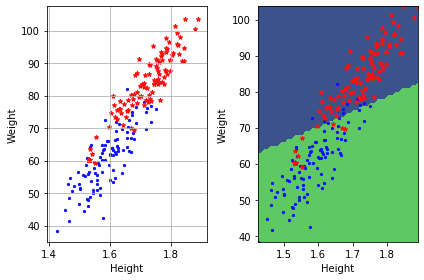

In [3]:
from my_regressions import least_squares
from plots import visualization

def least_square_classification_demo(y, x):
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w, loss = least_squares(y, tx)
    visualization(y, x, mean_x, std_x, w, "classification_by_least_square")
    
least_square_classification_demo(y, x)

## Logistic Regression

Compute your cost by negative log likelihood.

In [4]:
def sigmoid(t):
    """apply sigmoid function on t."""
    return 1 / (1 + math.exp(-t))

In [5]:
def calculate_loss(y, tx, w):
    """compute the cost by negative log likelihood."""
    txw = np.dot(tx,w)
    return np.sum(np.log(1+np.exp(txw))-y*txw)

In [6]:
from my_utils import array_map
def calculate_gradient(y, tx, w):
    """compute the gradient of loss."""
    txw = np.dot(tx,w)
    xt = tx.T
    sigxw = np.reshape(array_map(sigmoid, txw),(y.shape[0],1))
    return np.dot(xt, sigxw-y)

### Using Gradient Descent
Implement your function to calculate the gradient for logistic regression.

In [8]:
def learning_by_gradient_descent(y, tx, w, gamma):
    """
    Do one step of gradient descent using logistic regression.
    Return the loss and the updated w.
    """
    # why do they ask us compute the cost as a first step? not after computing the new w???
    gradient = calculate_gradient(y, tx, w)
    w = w - gamma * gradient
    loss = calculate_loss(y, tx, w)
    return loss, w

Demo!

Current iteration=0, loss=73.65627664417995
Current iteration=100, loss=43.42413267458537
Current iteration=200, loss=41.53790237065257
Current iteration=300, loss=41.096402253057065
Current iteration=400, loss=40.964146728561325
Current iteration=500, loss=40.91983716518712
Current iteration=600, loss=40.90409582980053
Current iteration=700, loss=40.898315877269795
Current iteration=800, loss=40.896152114878355
Current iteration=900, loss=40.89533264432541
Current iteration=1000, loss=40.8950200939895
Current iteration=1100, loss=40.894900369248205
Current iteration=1200, loss=40.894854385501866
Current iteration=1300, loss=40.89483669502793
Current iteration=1400, loss=40.89482988236233
Current iteration=1500, loss=40.89482725712262
loss=40.89482665245695


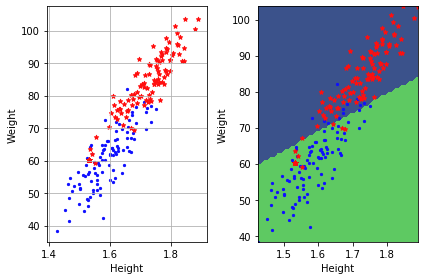

In [9]:
from helpers import de_standardize

def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    threshold = 1e-8
    gamma = 0.01
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_gradient_descent")
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_gradient_descent_demo(y, x)

Calculate your hessian below

In [10]:
def calculate_diagonal_s_element_nn(xn, w):
    xntw = np.dot(xn.T, w)
    sigmoid_xntw = array_map(sigmoid, xntw)
    snn = (1-sigmoid_xntw)*sigmoid_xntw
    return snn[0]

def calculate_diagonal_s(x, w):
    size = x.shape[0]
    s = np.zeros((size, size))
    for i in range(size):
        s[i,i] = calculate_diagonal_s_element_nn(tx[i,:], w)
    return s

def calculate_hessian(y, tx, w):
    """return the hessian of the loss function."""
    S = calculate_diagonal_s(tx, w)
    xts = np.dot(tx.T, S)
    xtsxt = np.dot(xts, tx)
    return xtsxt

Write a function below to return loss, gradient, and hessian.

In [11]:
def logistic_regression(y, tx, w):
    """return the gradient, and hessian."""
    hessian = calculate_hessian(y, tx, w)
    gradient = calculate_gradient(y, tx, w)
    return gradient, hessian

### Using Newton's method
Use Newton's method for logistic regression.

In [12]:
def learning_by_newton_method(y, tx, w):
    """
    Do one step on Newton's method.
    return the loss and updated w.
    """
    gradient, hessian = logistic_regression(y, tx, w)
    w = w - np.dot(np.linalg.inv(hessian), gradient)
    loss = calculate_loss(y, tx, w) 
    return loss, w

demo

Current iteration=0, the loss=63.41155373909581
Current iteration=1, the loss=47.30458619935057
Current iteration=2, the loss=41.99746742248446
Current iteration=3, the loss=40.95639863723793
Current iteration=4, the loss=40.89511993648958
Current iteration=5, the loss=40.89482561762708
Current iteration=6, the loss=40.89482560989059
loss=40.89482560989059


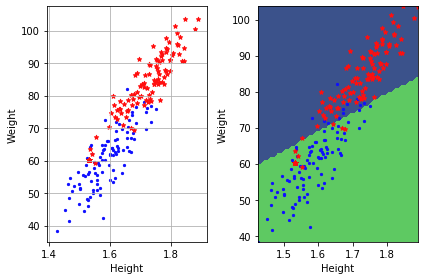

In [13]:
def logistic_regression_newton_method_demo(y, x):
    # init parameters
    max_iter = 100
    threshold = 1e-8
    lambda_ = 0.1
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_newton_method(y, tx, w)
        # log info
        if iter % 1 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_newton_method")
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_newton_method_demo(y, x)

### Using penalized logistic regression
Fill in the function below.

In [14]:
def penalized_logistic_regression(y, tx, w, lambda_):
    """return the loss, gradient, and hessian."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient, and hessian: TODO
    # ***************************************************
    raise NotImplementedError

In [15]:
def learning_by_penalized_gradient(y, tx, w, gamma, lambda_):
    """
    Do one step of gradient descent, using the penalized logistic regression.
    Return the loss and updated w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient: TODO
    # ***************************************************
    raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # update w: TODO
    # ***************************************************
    raise NotImplementedError
    return loss, w

In [16]:
def logistic_regression_penalized_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    gamma = 0.01
    lambda_ = 0.1
    threshold = 1e-8
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_penalized_gradient_descent")
    print("loss={l}".format(l=calculate_loss(y, tx, w)))
    
logistic_regression_penalized_gradient_descent_demo(y, x)

NotImplementedError: 